In [1]:
import warnings
# Desactivar todas las advertencias temporalmente
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data/datosv1.csv")
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_35948\648345405.py:1: DtypeWarning: Columns (460,461,463) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("data/datos.csv")


,Unnamed: 0,ID_UC,DATA_REFERENCIA,ID_OCORRENCIA,RESULTADO,ENERGIA_A_INCREMENTAR,ENERGIA_A_RECUPERAR,N126,N155,N156,...,N663,N664,N665,D100,D222,D103,D102,D223,D101,D224
0,0,9005721560,2013-01-21 15:01:00,A-10003923,10,NaN,NaN,0,0,NaN,...,NaN,NaN,120.0,2012-02-01,NaN,NaN,NaN,NaN,NaN,2013-01-01
1,1,9005781700,2013-01-21 15:03:00,A-10004923,10,NaN,NaN,0,0,NaN,...,NaN,NaN,234.0,2012-02-01,NaN,NaN,NaN,NaN,NaN,2013-01-01
2,2,3813704320,2013-01-21 15:10:00,A-10005923,10,NaN,NaN,0,0,NaN,...,NaN,NaN,381.0,2012-02-01,NaN,NaN,NaN,NaN,NaN,2013-01-01
3,3,401600580,2012-01-25 16:48:00,A-1000831,10,NaN,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,402400780,2012-01-25 16:48:00,A-1000832,10,NaN,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dimensiones de la data

In [3]:
df.shape

(80741, 466)

In [4]:
# Calcular la cantidad total de valores nulos en el DataFrame
total_nulos = df.isna().sum().sum()

# Calcular el porcentaje total de valores nulos
porcentaje_nulos = (total_nulos / (df.shape[0] * df.shape[1])) * 100

print(f"Porcentaje total de valores nulos en el DataFrame: {porcentaje_nulos:.2f}%")

Porcentaje total de valores nulos en el DataFrame: 27.17%


### Limpieza y estandarización preliminar de datos

In [5]:
# Las siguientes columnas se eliminan por no tener información relevante para el análisis
# Unnamed: 0, se elimina porque corresponde al número de la observación y la indexación cumple esa función
# ID_UC, se elimina la unidad de consumo porque no es relevante
# DATA_REFERENCIA, se elimina porque no es de interés eliminar la data como una serie de tiempo
# ID_OCORRENCIA, se elimina el ID de ocurrencia porque no es relevante

columnas_a_borrar = ["Unnamed: 0", "ID_UC", "DATA_REFERENCIA", "ID_OCORRENCIA"]
df = df.drop(columnas_a_borrar, axis=1)
df.head()

,RESULTADO,ENERGIA_A_INCREMENTAR,ENERGIA_A_RECUPERAR,N126,N155,N156,N157,N158,N159,N160,...,N663,N664,N665,D100,D222,D103,D102,D223,D101,D224
0,10,NaN,NaN,0,0,NaN,0,NaN,NaN,0,...,NaN,NaN,120.0,2012-02-01,NaN,NaN,NaN,NaN,NaN,2013-01-01
1,10,NaN,NaN,0,0,NaN,0,NaN,NaN,0,...,NaN,NaN,234.0,2012-02-01,NaN,NaN,NaN,NaN,NaN,2013-01-01
2,10,NaN,NaN,0,0,NaN,0,NaN,NaN,0,...,NaN,NaN,381.0,2012-02-01,NaN,NaN,NaN,NaN,NaN,2013-01-01
3,10,NaN,NaN,0,0,NaN,0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,NaN,NaN,0,0,NaN,0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_rows', None)
# Contar la cantidad de nulos por columna
cantidad_nulos = df.isnull().sum()
# Calcular el porcentaje de nulos sobre el total de cada columna
porcentaje_nulos = (cantidad_nulos / len(df)) * 100
# Crear un nuevo DataFrame para mostrar los resultados
resultados = pd.DataFrame({'Cantidad de Nulos': cantidad_nulos, 'Porcentaje de Nulos (%)': porcentaje_nulos})
resultados.sort_values(by='Porcentaje de Nulos (%)', ascending=False)

,Cantidad de Nulos,Porcentaje de Nulos (%)
N268,80741,100.000000
N192,80741,100.000000
N269,80741,100.000000
N271,80741,100.000000
N246,80741,100.000000
N277,80741,100.000000
N302,80741,100.000000
N406,80741,100.000000
N156,80741,100.000000
D102,80741,100.000000


In [7]:
resultados_ordenados = resultados.sort_values(by='Porcentaje de Nulos (%)', ascending=False)
variables_con_nulos_mayor_a_40 = resultados_ordenados[resultados_ordenados['Porcentaje de Nulos (%)'] > 40]

In [8]:
# Obtiene la lista de nombres de variables resultante
lista_variables = variables_con_nulos_mayor_a_40.index.tolist()
print(lista_variables)

['N268', 'N192', 'N269', 'N271', 'N246', 'N277', 'N302', 'N406', 'N156', 'D102', 'N303', 'N301', 'N336', 'N335', 'N334', 'N325', 'N272', 'N283', 'N309', 'N310', 'N313', 'N314', 'N324', 'N262', 'N245', 'N392', 'N391', 'N393', 'N401', 'N341', 'N342', 'N340', 'N339', 'N338', 'N337', 'N276', 'N414', 'N196', 'D103', 'N186', 'N400', 'N185', 'N502', 'N413', 'N399', 'N323', 'N285', 'D223', 'D222', 'N304', 'N408', 'N660', 'N167', 'N166', 'N333', 'N274', 'N664', 'N663', 'N658', 'N332', 'N267', 'N326', 'N315', 'N659', 'D101', 'N188', 'N311', 'N205', 'N434', 'N273', 'N331', 'N597', 'N615', 'N594', 'N623', 'N598', 'N614', 'N639', 'N638', 'N629', 'N596', 'N605', 'N617', 'N587', 'N585', 'N599', 'N624', 'N616', 'N630', 'N640', 'N641', 'N606', 'N586', 'N619', 'N600', 'N625', 'N595', 'N618', 'N631', 'N643', 'N642', 'N607', 'N371', 'N425', 'N426', 'N279', 'N369', 'N419', 'N562', 'N563', 'N559', 'N558', 'N570', 'N565', 'N571', 'N564', 'N646', 'N645']


In [9]:
df = df.drop(lista_variables, axis=1)
df.head()

,RESULTADO,ENERGIA_A_INCREMENTAR,ENERGIA_A_RECUPERAR,N126,N155,N157,N158,N159,N160,N161,...,N652,N653,N654,N656,N657,N661,N662,N665,D100,D224
0,10,NaN,NaN,0,0,0,NaN,NaN,0,120.0,...,0,0,NaN,120.0,1,0,0,120.0,2012-02-01,2013-01-01
1,10,NaN,NaN,0,0,0,NaN,NaN,0,234.0,...,0,0,NaN,234.0,1,0,0,234.0,2012-02-01,2013-01-01
2,10,NaN,NaN,0,0,0,NaN,NaN,0,381.0,...,0,0,NaN,381.0,1,0,0,381.0,2012-02-01,2013-01-01
3,10,NaN,NaN,0,0,0,NaN,NaN,0,NaN,...,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN
4,10,NaN,NaN,0,0,0,NaN,NaN,0,NaN,...,0,0,NaN,NaN,0,0,0,NaN,NaN,NaN


Las variables ENERGIA_A_INCREMENTAR y ENERGIA_A_RECUPERAR para el conjunto de datos abordado, se excluirán debiado a que tienen una dependencia directa  con la variable resultado.

In [10]:
df = df.drop(['ENERGIA_A_INCREMENTAR', 'ENERGIA_A_RECUPERAR'], axis=1)
df.head()

# Eliminar fechas
df = df.drop(['D100', 'D224'], axis=1)
df.head()

,RESULTADO,N126,N155,N157,N158,N159,N160,N161,N162,N163,...,N650,N651,N652,N653,N654,N656,N657,N661,N662,N665
0,10,0,0,0,NaN,NaN,0,120.0,120.0,NaN,...,NaN,NaN,0,0,NaN,120.0,1,0,0,120.0
1,10,0,0,0,NaN,NaN,0,234.0,234.0,NaN,...,NaN,NaN,0,0,NaN,234.0,1,0,0,234.0
2,10,0,0,0,NaN,NaN,0,381.0,381.0,NaN,...,NaN,NaN,0,0,NaN,381.0,1,0,0,381.0
3,10,0,0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,0,0,0,NaN
4,10,0,0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,0,0,0,NaN


Los valores de la columna RESULTADO corresponden a 10 cuando la inspección a la instalación se determina normal y 7 cuando la inspección arroja un fraude, que son las instalaciones que nos interesa verificar.

In [11]:
column_means = df.mean().round(0)
df = df.fillna(column_means)
df.head()

,RESULTADO,N126,N155,N157,N158,N159,N160,N161,N162,N163,...,N650,N651,N652,N653,N654,N656,N657,N661,N662,N665
0,10,0,0,0,0.0,-0.0,0,120.0,120.0,508.0,...,-0.0,-0.0,0,0,412.0,120.0,1,0,0,120.0
1,10,0,0,0,0.0,-0.0,0,234.0,234.0,508.0,...,-0.0,-0.0,0,0,412.0,234.0,1,0,0,234.0
2,10,0,0,0,0.0,-0.0,0,381.0,381.0,508.0,...,-0.0,-0.0,0,0,412.0,381.0,1,0,0,381.0
3,10,0,0,0,0.0,-0.0,0,472.0,452.0,508.0,...,-0.0,-0.0,0,0,412.0,576.0,0,0,0,242.0
4,10,0,0,0,0.0,-0.0,0,472.0,452.0,508.0,...,-0.0,-0.0,0,0,412.0,576.0,0,0,0,242.0


### Gráficas descriptivas

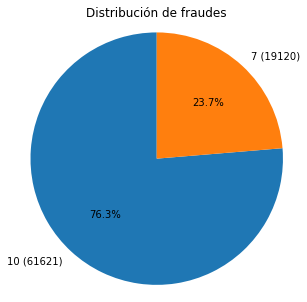

In [12]:
# Contar los valores únicos en la columna 'Resultado'
conteo_resultados = df['RESULTADO'].value_counts()

# Crear un gráfico de torta con los valores agregados a las etiquetas
plt.figure(figsize=(5, 5))
plt.pie(conteo_resultados, labels=[f'{label} ({count})' for label, count in conteo_resultados.iteritems()], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de fraudes')
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse

# Mostrar el gráfico de torta
plt.show()

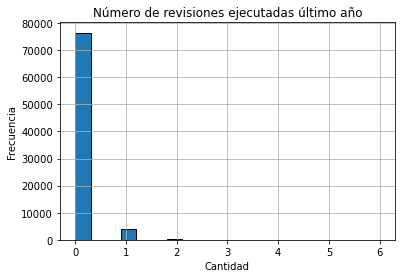

In [13]:
# Crear un histograma de la columna 'N294'
plt.hist(df['N294'], bins=20, edgecolor='k')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Número de revisiones ejecutadas último año')
plt.grid(True)

# Mostrar el histograma
plt.show()


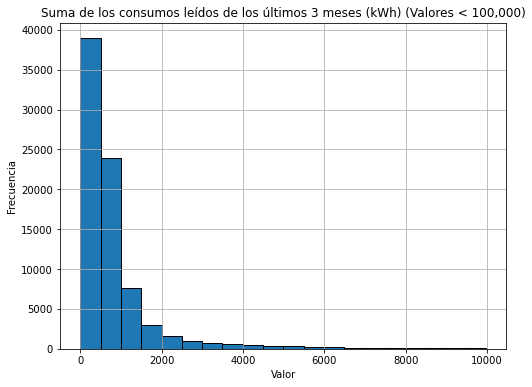

In [14]:
# Filtrar los valores menores a 100,000 en la columna 'N479'
valores_filtrados = df[df['N479'] < 10000]['N479']

# Crear un histograma para los valores filtrados
plt.figure(figsize=(8, 6))
plt.hist(valores_filtrados, bins=20, edgecolor='k')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Suma de los consumos leídos de los últimos 3 meses (kWh) (Valores < 100,000)')
plt.grid(True)

# Mostrar el histograma
plt.show()

In [15]:
# Selecciona las columnas desde N445 hasta N478
columnas_a_promediar = df.loc[:, 'N445':'N478']

# Calcula el promedio de estas columnas
promedio_columnas = columnas_a_promediar.mean(axis=1)
promedio_columnas.describe()

count     80741.000000
mean        549.539411
std        2734.419417
min           0.031250
25%         167.250000
50%         289.125000
75%         536.625000
max      288892.312500
dtype: float64

### Elaboración de un dataframe para principales variables relevantes

In [16]:
dfmedidas = pd.DataFrame({'Promedio de facturación mensual': promedio_columnas})

dfmedidas = dfmedidas.merge(df[['N294']], left_index=True, right_index=True)
dfmedidas = dfmedidas.rename(columns={'N294': 'Revisiones ejecutadas último año'})

dfmedidas = dfmedidas.merge(df[['RESULTADO']], left_index=True, right_index=True)
dfmedidas = dfmedidas.rename(columns={'RESULTADO': 'RESULTADO'})

dfmedidas = dfmedidas.merge(df[['N479']], left_index=True, right_index=True)
dfmedidas = dfmedidas.rename(columns={'N479': 'Suma de los consumos leídos de los últimos 3 meses (kWh)'})

df['N479']

dfmedidas.head()

,Promedio de facturación mensual,Revisiones ejecutadas último año,RESULTADO,Suma de los consumos leídos de los últimos 3 meses (kWh)
0,549.53125,0,10,120.0
1,549.53125,0,10,234.0
2,549.53125,0,10,381.0
3,549.53125,0,10,0.0
4,549.53125,0,10,0.0


In [17]:
dfmedidas.describe()

,Promedio de facturación mensual,Revisiones ejecutadas último año,RESULTADO,Suma de los consumos leídos de los últimos 3 meses (kWh)
count,80741.000000,80741.000000,80741.000000,80741.000000
mean,549.539411,0.059226,9.289580,1201.070522
std,2734.419417,0.267345,1.275376,6267.888338
min,0.031250,0.000000,7.000000,0.000000
25%,167.250000,0.000000,10.000000,212.000000
50%,289.125000,0.000000,10.000000,519.000000
75%,536.625000,0.000000,10.000000,917.000000
max,288892.312500,6.000000,10.000000,617300.000000


In [18]:
dfmedidas["Revisiones ejecutadas último año"].value_counts()
# Obtener los valores y sus conteos
conteos_revisiones = dfmedidas["Revisiones ejecutadas último año"].value_counts().reset_index()

# Renombrar las columnas
conteos_revisiones.columns = ['Revisiones', 'Cantidad']

# Crear un nuevo DataFrame
df_resultado = pd.DataFrame(conteos_revisiones)
df_resultado

,Revisiones,Cantidad
0,0,76465
1,1,3864
2,2,344
3,3,50
4,4,12
5,5,4
6,6,2
